# Factors Affecting Borrower APR
## By Tal Davidson

## Exploration Overview
In this investigation, we will delve into the variables that may impact a borrower's APR. Our primary focus will be on the initial loan amount, ProsperRating (Alpha), and Loan Term.


## Data Overview

The dataset encompasses 113,937 loans, each with 81 unique attributes such as loan amount, borrower rate (interest rate), current loan status, and borrower income.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

loans = pd.read_csv('prosperLoanData.csv')

rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered = pd.api.types.CategoricalDtype(ordered=True, categories=rating_order)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered)


## Borrower APR

The Borrower APR distribution exhibits multiple modes. It features a small peak around 0.09, a significant peak at 0.18, another small peak around 0.29, and a substantial peak between 0.35 and 0.36. Instances of APR exceeding 0.4 are rare. A higher APR indicates a greater interest rate on borrowed funds.

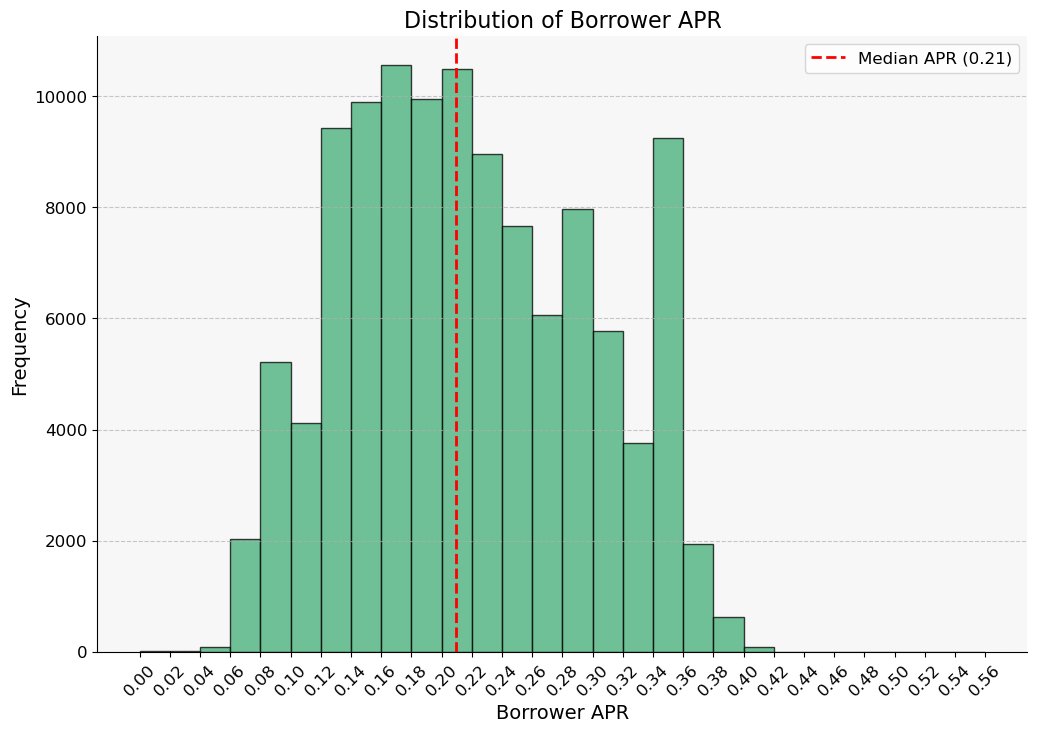

In [2]:
# Create an aesthetically enhanced histogram to visualize the distribution of Borrower APR

# Set the figure size for the plot
plt.figure(figsize=[12, 8])

# Define the bin edges for the histogram with larger bins (0.02)
bins = np.arange(0, loans['BorrowerAPR'].max() + 0.05, 0.02)

# Plot the histogram using the 'BorrowerAPR' column from the 'loans' dataframe
# Customize the color of the bars to a pleasing shade of green
# Add black edges to the bars for better visibility
plt.hist(data=loans, x='BorrowerAPR', bins=bins, color='#41ae76', edgecolor='black', alpha=0.75)

# Customize the x-axis ticks to display with two decimal places and rotate them for better readability
plt.xticks(ticks=bins, labels=['{:.2f}'.format(v) for v in bins], rotation=45, fontsize=12)

# Set the plot title and labels for the x and y axes with larger fonts
plt.title("Distribution of Borrower APR", fontsize=16)
plt.xlabel("Borrower APR", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a vertical line to indicate the median Borrower APR
median_apr = loans['BorrowerAPR'].median()
plt.axvline(x=median_apr, color='red', linestyle='--', linewidth=2, label=f'Median APR ({median_apr:.2f})')

# Add a legend to explain the vertical line
plt.legend(fontsize=12)

# Display the histogram with a subtle background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Remove the right and top spines to clean up the appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize the tick label font size
plt.tick_params(axis='both', which='major', labelsize=12)

# Display the histogram
plt.show()



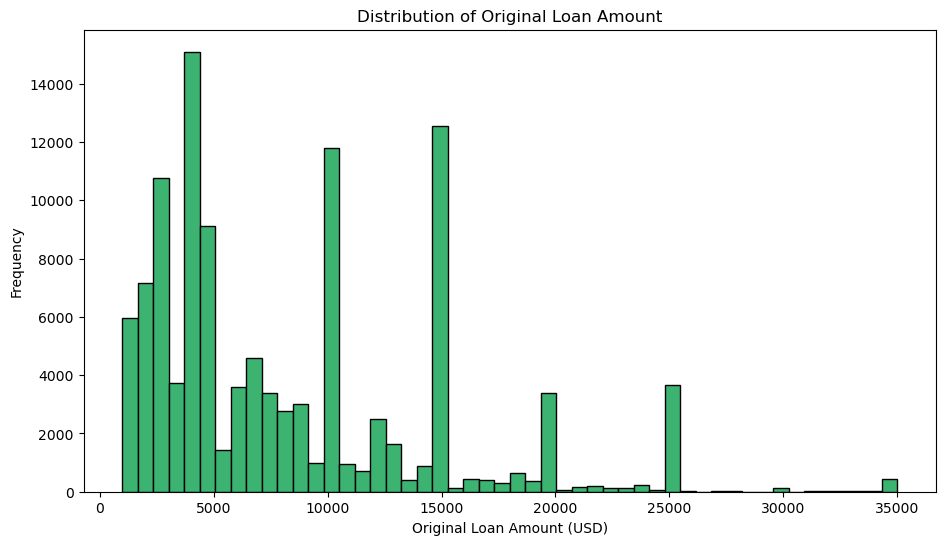

In [3]:
plt.figure(figsize=[11, 6])
plt.hist(data=loans, x='LoanOriginalAmount', bins=50, color='mediumseagreen', edgecolor='black')
plt.title("Distribution of Original Loan Amount")
plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Frequency')
plt.show()

## Original Loan Amount
The highest loan frequency is around `$4,000`, followed by `$15,000` and `$10,000`, with additional peaks at `$2,000` and `$5,000`.

## ProsperRating (Alpha)
The plot indicates that the most common ProsperRating (Alpha) scores are C, B, and D.

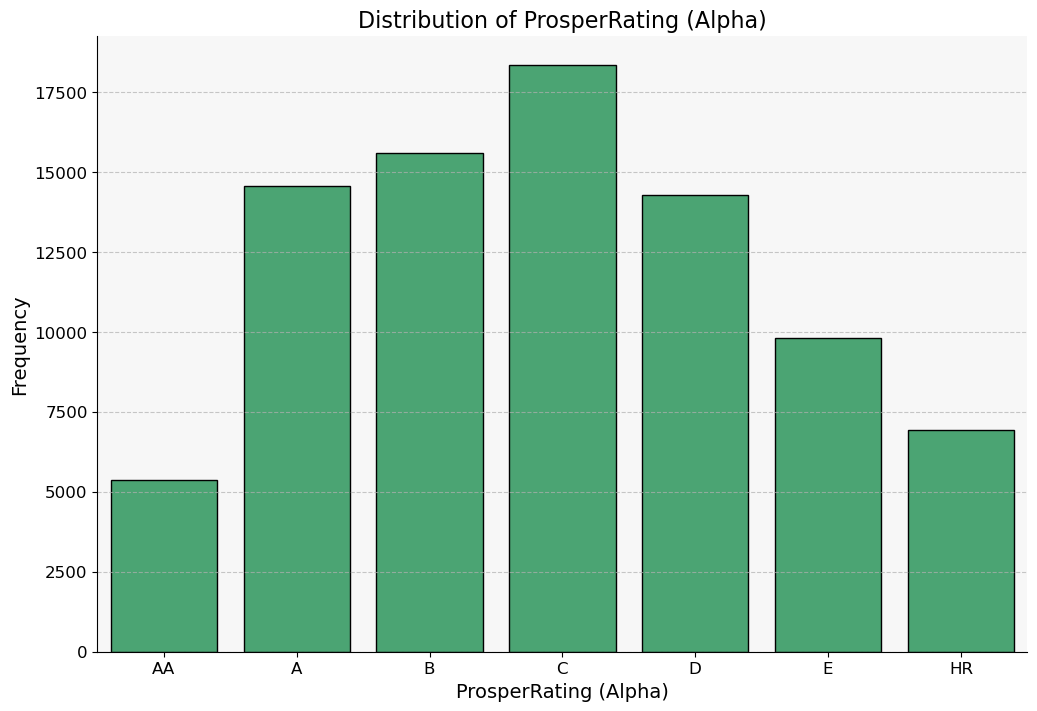

In [4]:
# Create an aesthetically enhanced count plot to visualize the distribution of ProsperRating (Alpha)

# Set the figure size for the plot
plt.figure(figsize=[12, 8])

# Create the count plot using Seaborn
# Customize the color of the bars to 'mediumseagreen' and add black edges for better visibility
sns.countplot(data=loans, x='ProsperRating (Alpha)', color='mediumseagreen', edgecolor='black')

# Set the title of the plot with a larger font size
plt.title('Distribution of ProsperRating (Alpha)', fontsize=16)

# Label the x-axis with 'ProsperRating (Alpha)' and set the font size
plt.xlabel('ProsperRating (Alpha)', fontsize=14)

# Label the y-axis with 'Frequency' and set the font size
plt.ylabel('Frequency', fontsize=14)

# Customize the font size of the tick labels on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the background color of the plot
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Remove the right and top spines to clean up the appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the enhanced count plot
plt.show()


## Borrower APR vs. Original Loan Amount
There is a negative relationship between borrower APR and the original loan amount, meaning that as the loan amount increases, the APR tends to decrease.

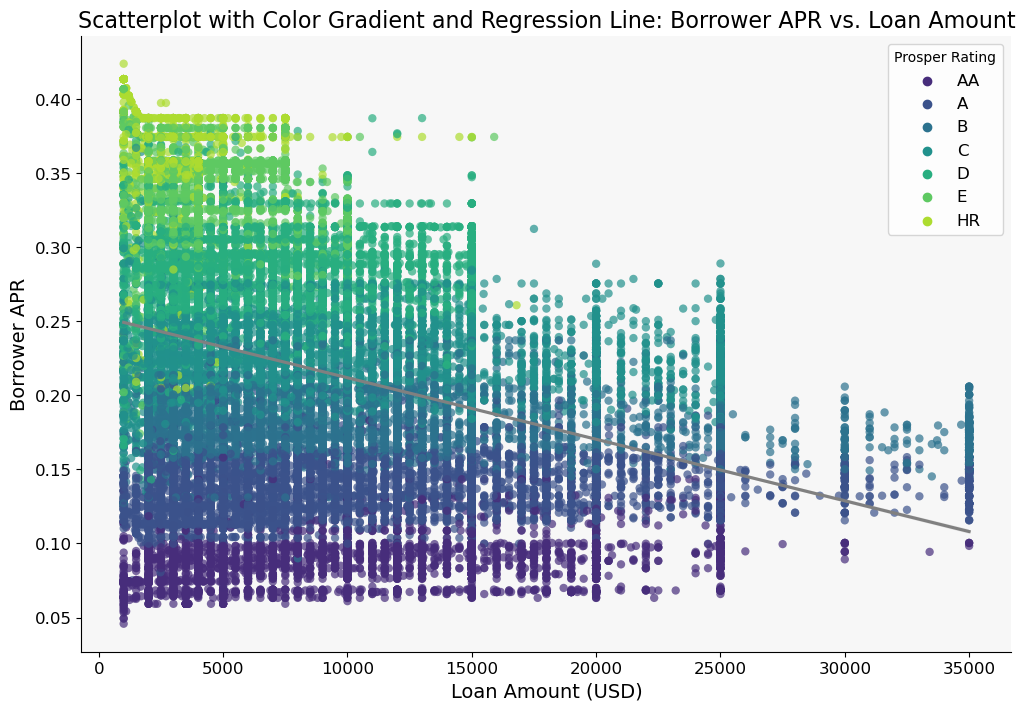

In [5]:
# Create a Scatterplot with Color Gradient and Regression Line to visualize Borrower APR vs. Loan Amount

# Set the figure size for the plot
plt.figure(figsize=[12, 8])

# Create a scatterplot using Seaborn to show 'LoanOriginalAmount' vs. 'BorrowerAPR'
# Use a color gradient to represent data density
# 'hue' parameter can be used to map another variable to the color (optional)
sns.scatterplot(data=loans, x='LoanOriginalAmount', y='BorrowerAPR', hue='ProsperRating (Alpha)',
                palette='viridis', alpha=0.7, edgecolor='none')

# Add a regression line to the scatterplot to visualize the linear relationship
sns.regplot(data=loans, x='LoanOriginalAmount', y='BorrowerAPR', scatter=False, color='gray')

# Customize the x-axis label with a larger font size
plt.xlabel('Loan Amount (USD)', fontsize=14)

# Customize the y-axis label with a larger font size
plt.ylabel('Borrower APR', fontsize=14)

# Set the title of the plot with a larger font size
plt.title('Scatterplot with Color Gradient and Regression Line: Borrower APR vs. Loan Amount', fontsize=16)

# Customize the font size of the tick labels on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the background color of the plot
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Remove the right and top spines to clean up the appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a legend to indicate the color mapping (if 'hue' parameter is used)
plt.legend(title='Prosper Rating', fontsize=12)

# Display the enhanced Scatterplot with Color Gradient and Regression Line
plt.show()


## Borrower APR by Loan Term and ProsperRating (Alpha)
- For AA-B ratings, the APR tends to increase with longer loan terms.
- Conversely, for C-HR ratings, the APR generally decreases with longer loan terms.

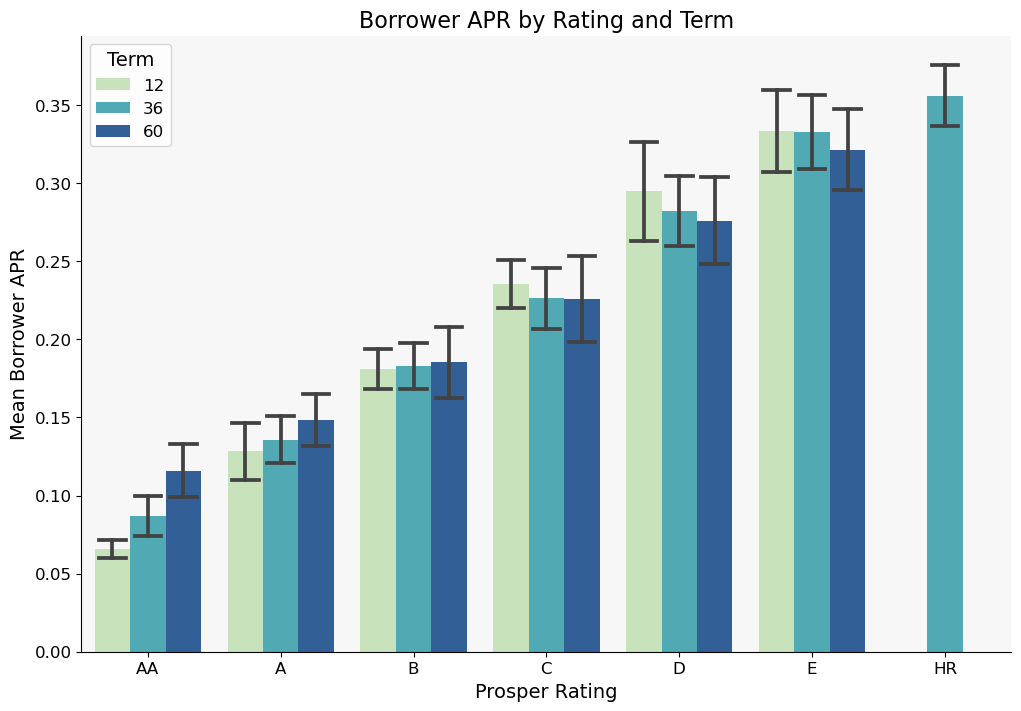

In [6]:
# Create an Enhanced Point Plot with Error Bars to visualize Borrower APR by Rating and Term

# Set the figure size for the plot
plt.figure(figsize=[12, 8])

# Create a barplot using Seaborn to show 'BorrowerAPR' by 'ProsperRating (Alpha)' and 'Term'
# Customize the color palette, dodge, and capsize for error bars
sns.barplot(data=loans, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
            palette='YlGnBu', dodge=0.4, ci='sd', capsize=0.2)

# Customize the title with a larger font size
plt.title('Borrower APR by Rating and Term', fontsize=16)

# Customize the y-axis label with a larger font size
plt.ylabel('Mean Borrower APR', fontsize=14)

# Customize the x-axis label with a larger font size
plt.xlabel('Prosper Rating', fontsize=14)

# Customize the font size of the tick labels on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend with a larger font size
plt.legend(title='Term', fontsize=12, title_fontsize=14)

# Customize the background color of the plot
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Remove the right and top spines to clean up the appearance
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the enhanced Point Plot with Error Bars
plt.show()


In [ ]:
!jupyter nbconvert BorrowerAPR_slide_deck.ipynb --to slides --post serve --no-input --no-prompt